In [1]:
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('ggplot')

In [2]:
sumnozone = pd.read_csv(
    'Ozone_summary_2020.csv', 
    index_col='Date Local',
    parse_dates=["Date Local"],
)

#Derive new BPM Arithmetic Mean

sumnozone['Arithmetic Mean BPM'] = ''
sumnozone['Arithmetic Mean BPM'] = sumnozone['Arithmetic Mean'].apply(lambda x : int(x*1000))

sumnozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247653 entries, 2020-02-29 to 2020-05-25
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           247653 non-null  int64  
 1   County Code          247653 non-null  int64  
 2   Site Num             247653 non-null  int64  
 3   Parameter Code       247653 non-null  int64  
 4   POC                  247653 non-null  int64  
 5   Latitude             247653 non-null  float64
 6   Longitude            247653 non-null  float64
 7   Datum                247653 non-null  object 
 8   Parameter Name       247653 non-null  object 
 9   Sample Duration      247653 non-null  object 
 10  Pollutant Standard   247653 non-null  object 
 11  Units of Measure     247653 non-null  object 
 12  Event Type           247653 non-null  object 
 13  Observation Count    247653 non-null  int64  
 14  Observation Percent  247653 non-null  float64
 15  A

In [3]:
datemask = sumnozone.loc['2020-06-01':'2020-12-31']
print(datemask['Arithmetic Mean'].describe())  # min=0 no negative value, but the largest number is 0.12 ppm

# datemask['AQI'].describe() # min=o no negative value
# print(datemask["County Name"].unique())
# print(datemask['State Name'].unique())

print(datemask['Arithmetic Mean BPM'].describe())


count    93233.000000
mean         0.032503
std          0.011150
min          0.000000
25%          0.024412
50%          0.031882
75%          0.040176
max          0.121000
Name: Arithmetic Mean, dtype: float64
count    93233.000000
mean        32.025452
std         11.154341
min          0.000000
25%         24.000000
50%         31.000000
75%         40.000000
max        121.000000
Name: Arithmetic Mean BPM, dtype: float64


605
52



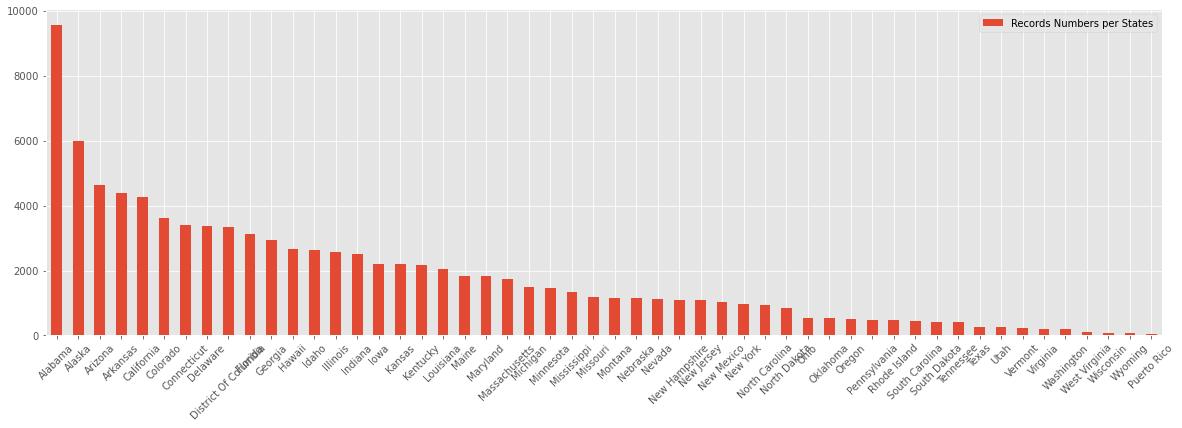

In [4]:
counties = datemask["County Name"].nunique()
print(counties)  #total 605 counties, more than counties in NO2 
states = datemask['State Name'].nunique()
print(states)  #Washington and Puerto Rico are not states, so total 50 states (all)

state = datemask["State Name"].value_counts().plot(kind='bar')
state.set_xticks(range(states))
state.set_xticklabels(datemask['State Name'].unique(), rotation=45)
state.legend(["Records Numbers per States"])
print()


State Name
Hawaii                   1
District Of Columbia     1
Alaska                   2
Rhode Island             3
Nebraska                 3
Vermont                  3
Delaware                 3
Idaho                    4
Puerto Rico              4
Nevada                   6
Arkansas                 6
South Dakota             7
New Hampshire            7
Montana                  8
Washington               8
Kansas                   8
Oregon                   8
Connecticut              8
New Mexico               9
Iowa                     9
North Dakota             9
Mississippi              9
West Virginia           10
Arizona                 10
Maine                   10
South Carolina          12
Massachusetts           13
Alabama                 13
Utah                    14
Wyoming                 14
New Jersey              15
Minnesota               15
Tennessee               15
Maryland                15
Oklahoma                17
Missouri                17
Louisiana        

<AxesSubplot:xlabel='State Name'>

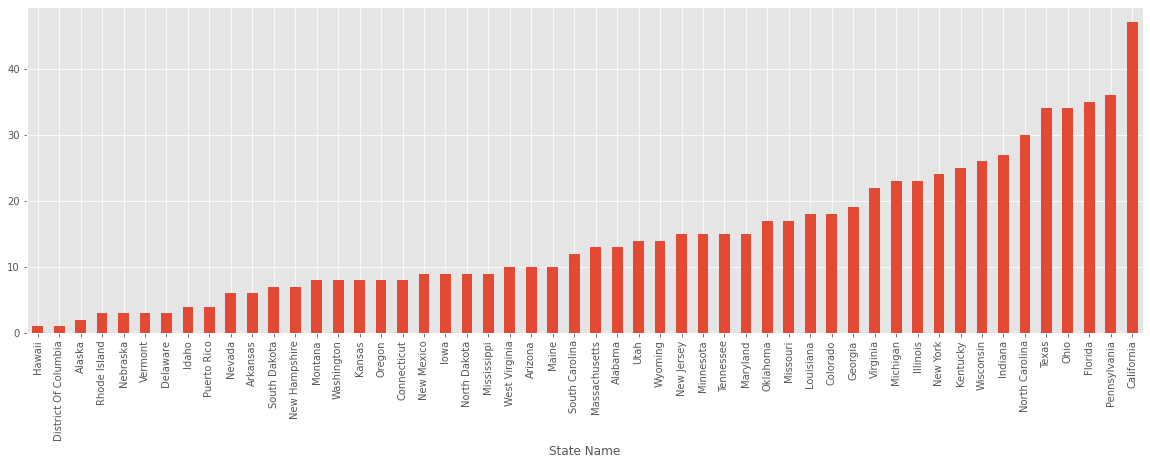

In [5]:
uniqcoun = datemask.groupby('State Name')['County Name'].nunique().sort_values()
print(uniqcoun)
uniqcoun.plot(kind='bar')

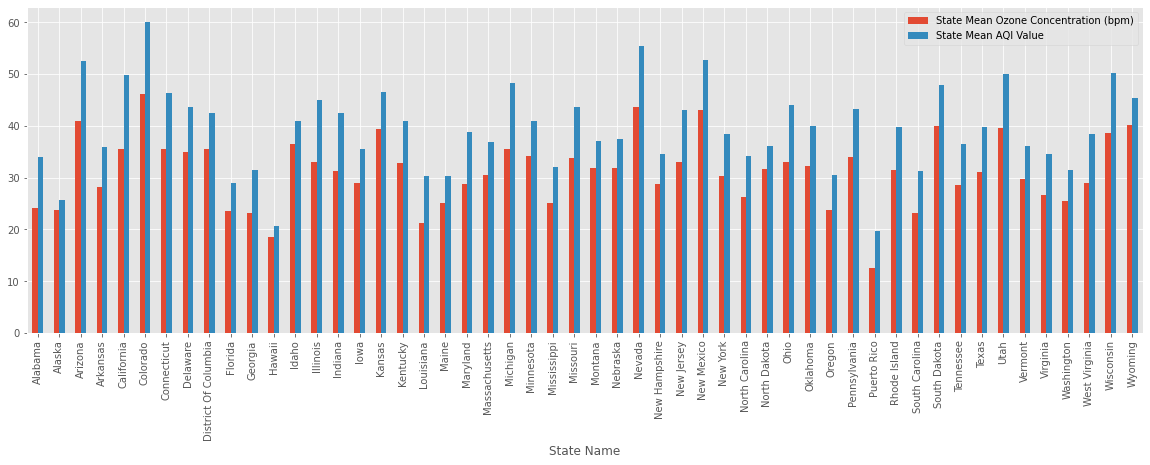

In [6]:
allstate = datemask.groupby('State Name')
stateozone_bpm = allstate['Arithmetic Mean BPM'].mean()
#stateozone = allstate['Arithmetic Mean'].mean()
stateaqi = allstate['AQI'].mean()


ax = pd.concat([stateozone_bpm, stateaqi], axis=1).plot(kind='bar')
ax.set_xticks(range(len(allstate)))
ax.set_xticklabels(allstate.groups.keys(), rotation=90)
ax.legend(["State Mean Ozone Concentration (bpm)", "State Mean AQI Value"])
print() 

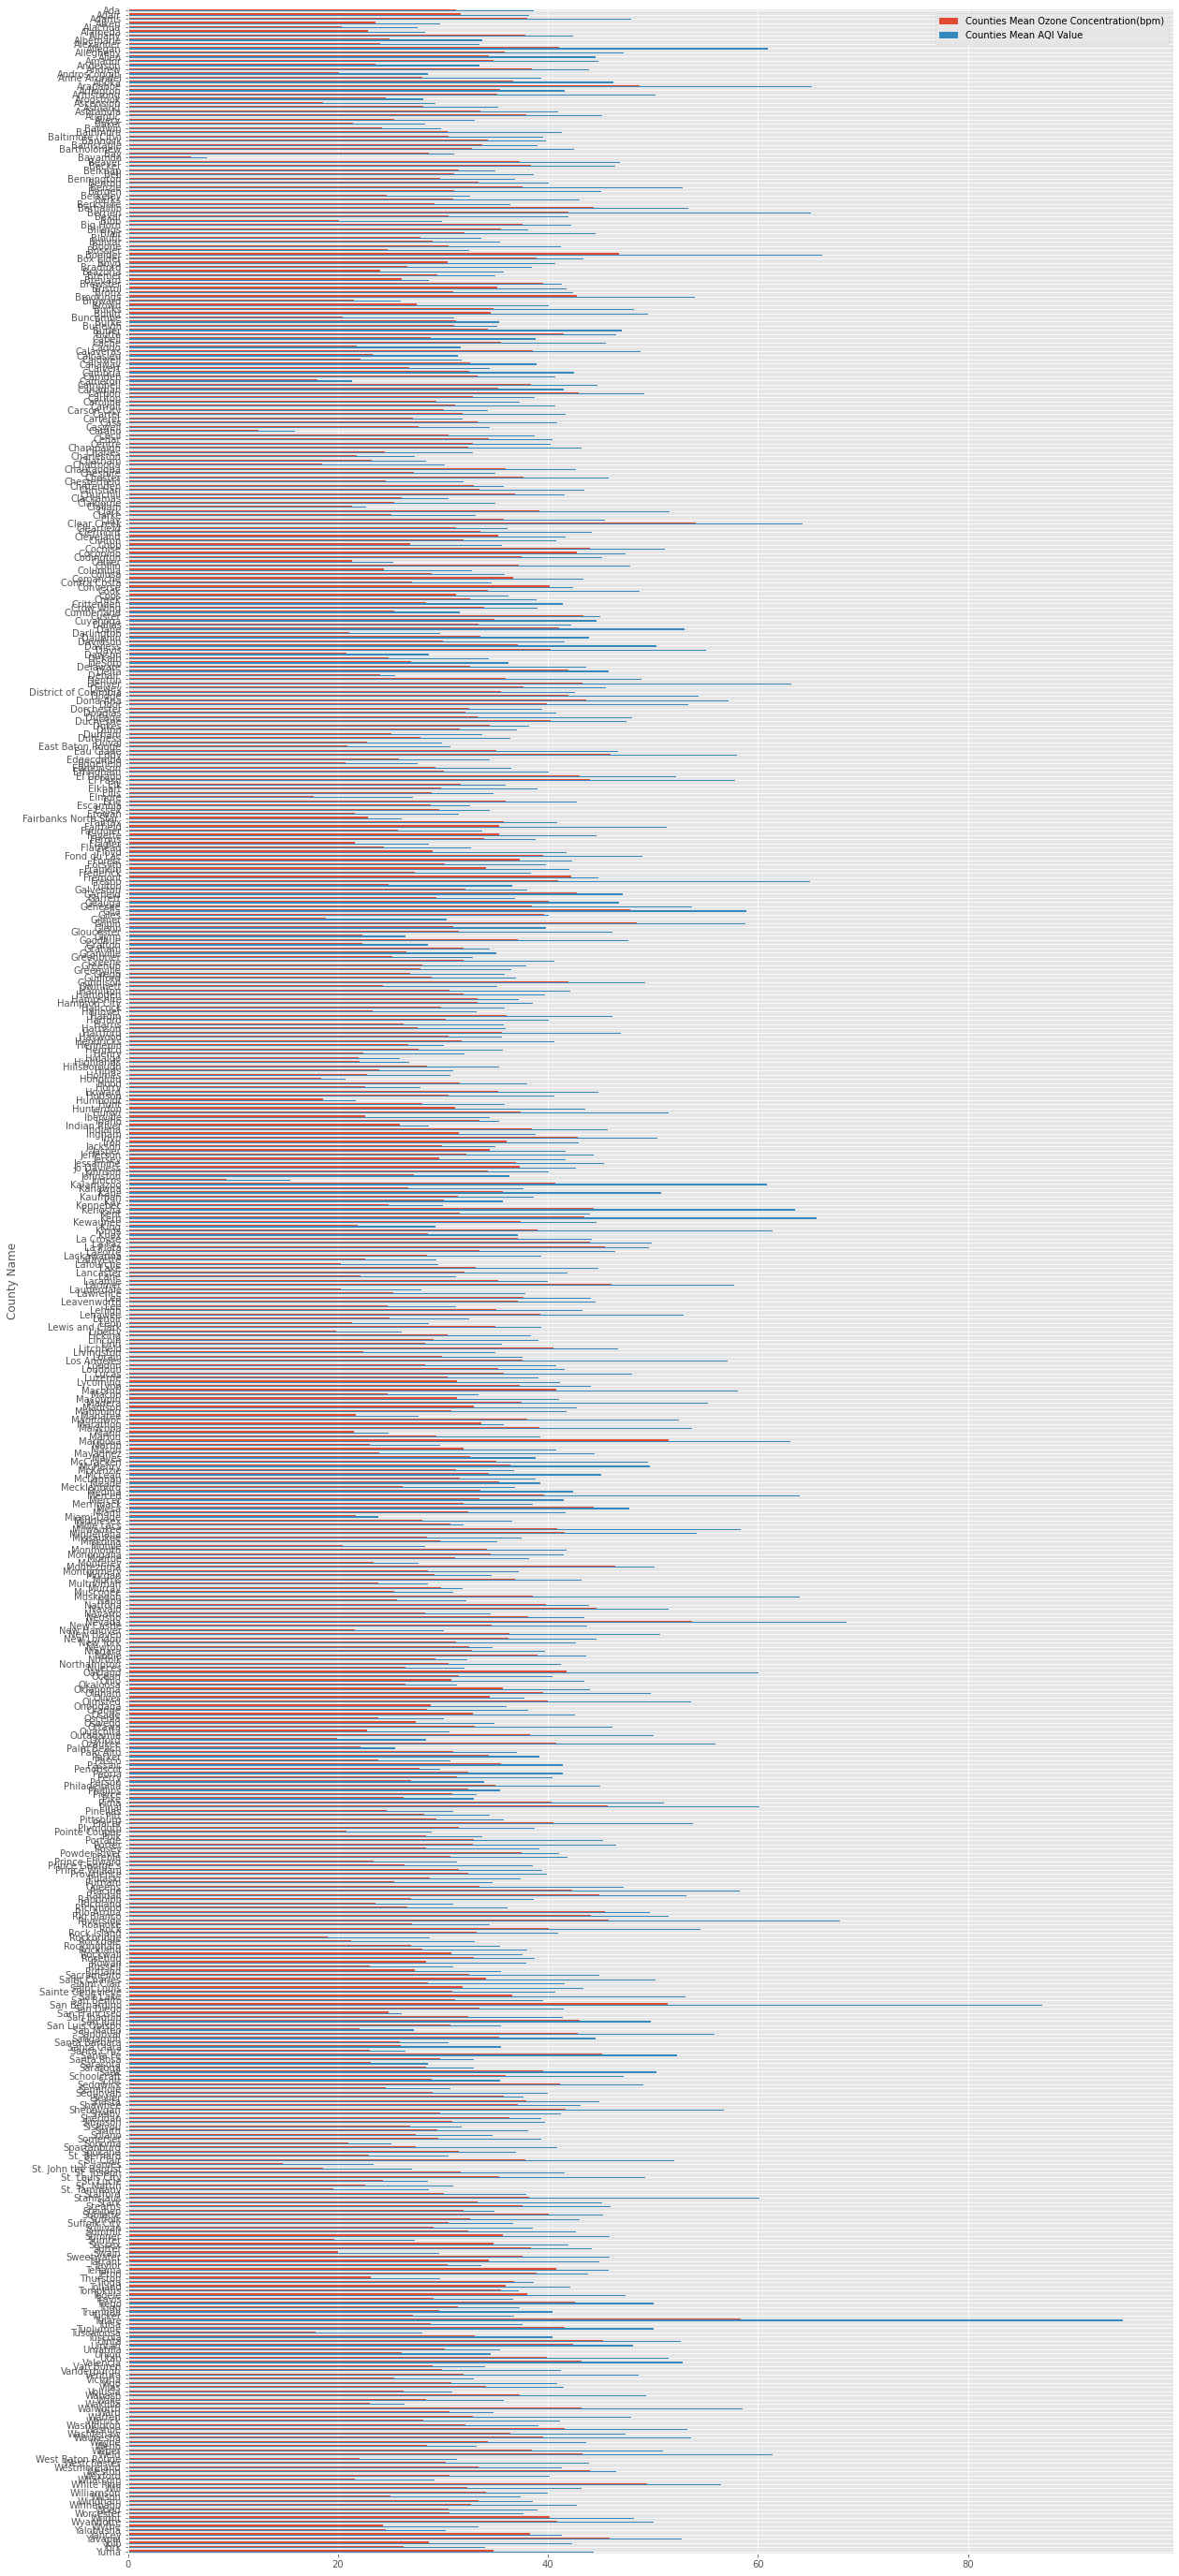

In [7]:
plt.rcParams['figure.figsize'] = (20, 50)
allcounties = datemask.sort_values('County Name').groupby('County Name')
countiesozone = allcounties['Arithmetic Mean BPM'].mean()
countiesaqi = allcounties['AQI'].mean()
df = pd.concat([countiesozone, countiesaqi], axis=1)
ax2 = df.plot(kind='barh')
ax2.set_yticks(range(len(allcounties)))
ax2.set_yticklabels(allcounties.groups.keys(), rotation=0)
ax2.invert_yaxis()
ax2.legend(["Counties Mean Ozone Concentration(bpm)", "Counties Mean AQI Value"])
print()